### เครื่องปรับอากาศ | 9000btu |                                          
##### TYPE 2 " TURN ON EVERYDAY//ONCE TIME


## NO. 1 (เครื่องปรับอากาศ) เวลาเปิด 22:00 - 06:00 **
![image](https://raw.githubusercontent.com/skyfighter/iHEMS/master/Device/pic/air-1.png)

In [37]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d = 3

time_a = pd.date_range('2016-09-01 00:00:00', periods=5760*(d+1), freq='15S')
# print time_a
time_b = pd.date_range('2016-09-01 00:00:14', periods=5760*(d+1), freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems","collected_info")
c = conn.cursor()

conn1= MySQLdb.connect("localhost","conn","hems","device")
c1 = conn1.cursor()

####### set databases to empty #########
query_empty = """truncate table device.aircont""" 
c1.execute(query_empty)
print "device.aircont are Empty!!! \n"

query = "SELECT watt FROM collected_info.1_aircont WHERE no >= '%s'   AND no <= '%s'; "% (0,3276)
df = pd.read_sql(query, conn)
# print df.watt[5]


#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(10, 60)
    duration_min =  random.randint(10, 60)
    duration_hour1 = ['19'] * 5 + ['20'] * 50 + ['21'] * 40 +['22'] * 5     #SET Start 7-10 pm.
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(10, 60)
    duration_min =  random.randint(10, 60)
    duration_hour =  random.randint(6, 8)     #SET 6-8 Hours
    seconds = (duration_hour*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item

days = 1
j = 0
i = 0
off_item = rand_turnon()  
no_item = rand_duration()  

while (j <= (5760*d)-1):    
    c1.execute("INSERT INTO device.aircont (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
    conn1.commit()
    j += 1
    while (off_item+(5760*(days-1)) <= j <= (no_item+off_item)+(5760*(days-1))):
        c1.execute("INSERT INTO device.aircont (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
        conn1.commit()
        i += 1    
        j += 1
        if (j == (no_item+off_item)+(5760*(days-1))):
            print j
            days +=1
            off_item = rand_turnon()  
            no_item = rand_duration() 
            i= 0
print "DONE!"


device.aircont are Empty!!! 

time to turn-on appliacne on 19 : 43 : 31 equal to 4734 items
consuming the appliance 7 hours 17 minutes 31 seconds that equal to 26251 seconds or 1750 items
6484
time to turn-on appliacne on 20 : 17 : 36 equal to 4870 items
consuming the appliance 8 hours 22 minutes 36 seconds that equal to 30156 seconds or 2010 items
12640
time to turn-on appliacne on 21 : 43 : 18 equal to 5213 items
consuming the appliance 7 hours 56 minutes 56 seconds that equal to 28616 seconds or 1907 items
18640
time to turn-on appliacne on 21 : 49 : 59 equal to 5239 items
consuming the appliance 6 hours 20 minutes 19 seconds that equal to 22819 seconds or 1521 items
DONE!


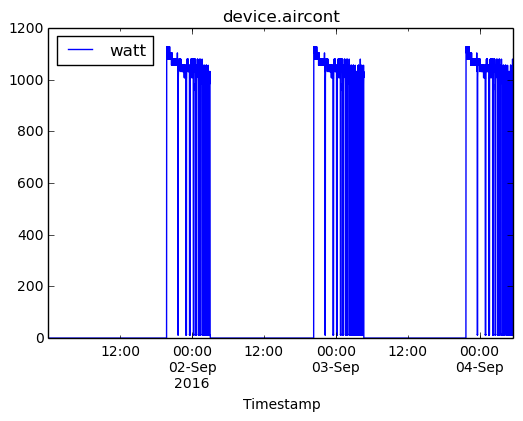

18640

In [45]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline  

time_a = pd.date_range('2016-09-01 00:00:00', periods=5760*(d+1), freq='15S')
# print time_a
time_b = pd.date_range('2016-09-01 00:00:14', periods=5760*(d+1), freq='15S')
# print time_b

conn1= MySQLdb.connect("localhost","conn","hems","device")
c1 = conn1.cursor()

# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[(5760*(d+1))-1])
# query = "SELECT Timestamp,watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],'2016-09-04 23:59:59')

df = pd.read_sql(query, conn1, index_col=['Timestamp'])

fig, ax = plt.subplots()
ax.set_title('device.aircont')
df.plot(ax=ax )
plt.show()
df.to_csv('file.csv')
len(df)

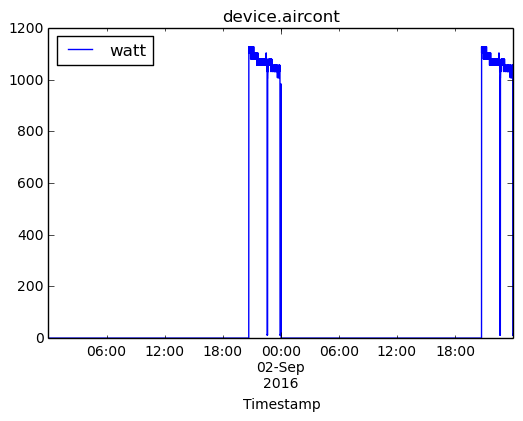

In [11]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline  
d =2
time_a = pd.date_range('2016-09-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-09-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn1= MySQLdb.connect("localhost","conn","hems","device")
c1 = conn1.cursor()

# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[11519])
df = pd.read_sql(query, conn1, index_col=['Timestamp'])

fig, ax = plt.subplots()
ax.set_title('device.aircont')
df.plot(ax=ax )
plt.show()
df.to_csv('file.csv')

In [10]:
clock = time_b[1].strftime("%H:%M:%S")
turnon = str(rand_turnon())
print type(clock)
print type(turnon)

8 : 20 : 47
<type 'str'>
<type 'str'>


In [43]:
time_b[(5760*(3+1))-1]

Timestamp('2016-09-04 23:59:59', freq='15S')